    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
----------------------------------------------------------------------

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


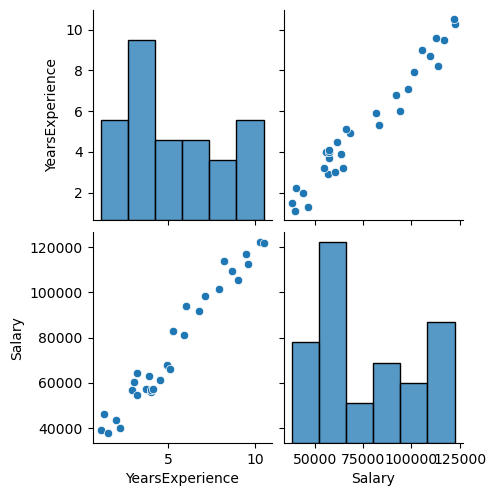

----------------------------------------------------------------------------------------------------


In [38]:
# Step-1: Understanding Business Problem

# This project is about the Salary of the employee depending on the employee experience in years.
# We have to identify that for how much years of experience how much salary will be there, means we have to identify the relation between salary and experience in yrs.


# Step-2: Data Understanding

# Here, in this dadaset we have only two columns one is YearsExperience and other is Salary, in which Salary is the dependent varaible,  which is depend on YearsExperience variable.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\\Data Science by SRK\\Regression\\Linear Regression\\Salary Data.csv")
print(df)
print("-"*100)

print(df["YearsExperience"].shape)   # ---> It will give how many records are there in given column
print(df["Salary"].shape)
print("-"*100)

print(df["YearsExperience"].unique())
print(df["Salary"].unique())
print("-"*100)

print(df.info())
print("-"*100)

print(df.describe())  # ---> It will give mean,min,max,quartiles,count,... of both the columns from that we can desribe that how's the data is varies in columns
print("-"*100)

print(df.cov())   # ---> It will covarience between YearsExperience variable and Salary variable
print("-"*100)

print(df.corr())  # ---> It will corelation between YearsExperience variable and Salary variable
print("-"*100)

sns.pairplot(df)  # ---> From this we can observe that their is a linear relation between input and output variable, we have to identify that relation
plt.show()
print("-"*100)



0
YearsExperience    0
Salary             0
dtype: int64
----------------------------------------------------------------------------------------------------


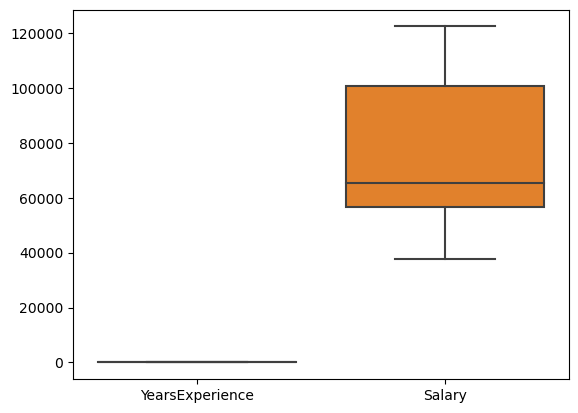

In [40]:
# Step-3: Preprocessing the Dataset

# Data Cleaning : Check whether any wrong data is in dataset or not

# Both columns in dataset having float datatypes so, there will not any wrong data or record.

print(df.duplicated().sum())  # ---> Both columns have zero duplicates value

print(df.isnull().sum())  # ---> Both columns have zero null value or missing value
print("-"*100)

sns.boxplot(df)   # ---> From this we can see that there is no ouliers are there for both the columns
plt.show()

# Data Wrangling : Check if any data transformation is required or not

# Here we can see that output variable have high magnitude(high value) as compared to the input variable, 
# so we should apply sacling to transform the high values into low values that we will get better accuracy.
# But appying scaling on output variable is not good.
# So, we should not apply scaling on output variable



In [54]:
# Step-4 : Split the dataset into two parts as train and test 

X = df[["YearsExperience"]]
y = df["Salary"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8, random_state =9)
print(X_train,X_test,y_train,y_test)
print("-"*100)

# Modelling :
     
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("coefficient:",model.coef_)
print("intercept:",model.intercept_)
print("-"*100)



    YearsExperience
18              5.9
19              6.0
11              4.0
6               3.0
2               1.5
15              4.9
12              4.0
16              5.1
13              4.1
29             10.5
10              3.9
14              4.5
0               1.1
26              9.5
17              5.3
8               3.2
20              6.8
25              9.0
1               1.3
27              9.6
24              8.7
22              7.9
21              7.1
28             10.3     YearsExperience
9               3.7
4               2.2
23              8.2
7               3.2
5               2.9
3               2.0 18     81363.0
19     93940.0
11     55794.0
6      60150.0
2      37731.0
15     67938.0
12     56957.0
16     66029.0
13     57081.0
29    121872.0
10     63218.0
14     61111.0
0      39343.0
26    116969.0
17     83088.0
8      64445.0
20     91738.0
25    105582.0
1      46205.0
27    112635.0
24    109431.0
22    101302.0
21     98273.0
28    122391.0


In [55]:
# Step-5: Prediction
    
ypred_train = model.predict(X_train)
print("ypred_train:",ypred_train)
ypred_test = model.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)

# Evaluation : 

from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train,ypred_train)
print("MAE_train:",MAE_train)
MAE_test = mean_absolute_error(y_test,ypred_test)
print("MAE_test:",MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train:",MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test:",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

ypred_train: [ 81452.71182935  82368.14555445  64059.47105244  54905.13380144
  41173.62792494  72298.37457835  64059.47105244  74129.24202855
  64974.90477755 123562.66318396  63144.03732734  68636.63967795
  37511.89302454 114408.32593296  75960.10947875  56736.00125164
  89691.61535525 109831.15730746  39342.76047474 115323.75965806
 107084.85613216  99761.38633136  92437.91653055 121731.79573376]
ypred_test: [ 61313.16987714  47581.66400064 102507.68750666  56736.00125164
  53989.70007634  45750.79655044]
----------------------------------------------------------------------------------------------------
MAE_train: 4617.418589254222
MAE_test: 5048.040682810789
----------------------------------------------------------------------------------------------------
MSE_train: 30731157.161052775
MSE_test: 36863353.79956883
----------------------------------------------------------------------------------------------------
RMSE_train: 5543.56899127744
RMSE_test: 6071.519892050823
---------

In [56]:
# Step-6: Model Selection

# condition-1 : Chech whether train accuracy = test accuracy or not
    
train_accuracy = model.score(X_train,y_train)
print("train_accuracy:",train_accuracy)
test_accuracy = model.score(X_test,y_test)
print("test_accuracy:",test_accuracy)
print("-"*100)

# condition-2 : Check whether test accuracy = cross validation score or not

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print(scores)
print("cross validation score:",scores.mean())

# condition-3: Check whether the model(identified equation) is good for Business Problem or not 
            # Here, there no accuracy requirement is there so this model is good for this Business Problem 

train_accuracy: 0.9552231515702403
test_accuracy: 0.9388416537799072
----------------------------------------------------------------------------------------------------
[ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
cross validation score: -0.05336427684509604


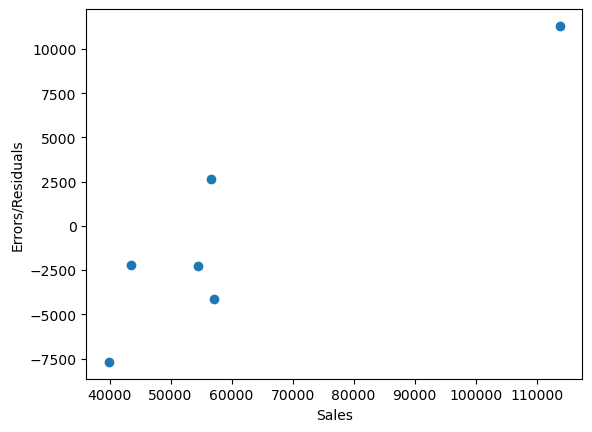

In [57]:
# Condition-4 : (Only for Linear Regression)
              # Check for Assumptions
    
# 1) Linearity : check whether the errors are linear or not

error = y_test - ypred_test

plt.scatter(y_test,error)
plt.xlabel("Sales")
plt.ylabel("Errors/Residuals")
plt.show()

In [58]:
# 2) Independence of Errors : Check whether one error is independent of other or not
                             #( output variable should not be dependent on errors occurs)
    
import statsmodels.formula.api as smf
    
model2 = smf.ols("y~X",data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        16:32:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.0

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


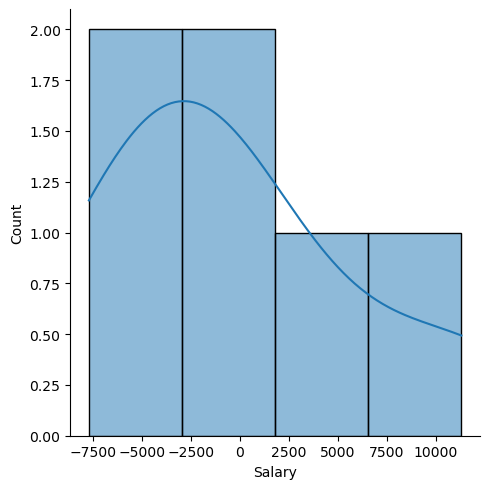

In [60]:
# 3) Normality : Check whether the errors are normally distributed or not

sns.displot(error,kde=True)
plt.show()

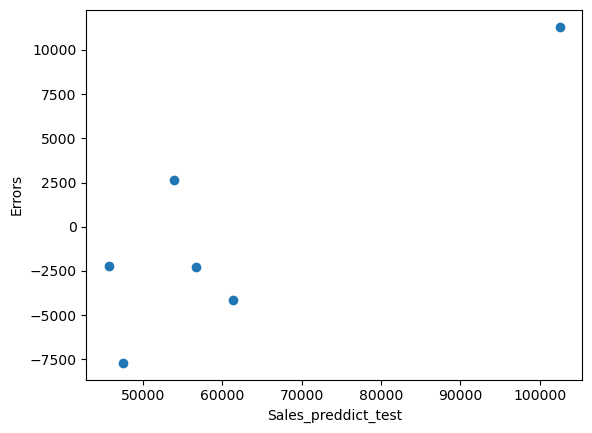

In [61]:
# 4) Equal variance of errors(Homoscadescity): Check whether the errors are equally desperse(deviated) from mean of errors(i.e.mean=0) or not

plt.scatter(ypred_test,error)
plt.xlabel("Sales_preddict_test")
plt.ylabel("Errors")
plt.show()